# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [ ]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [ ]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

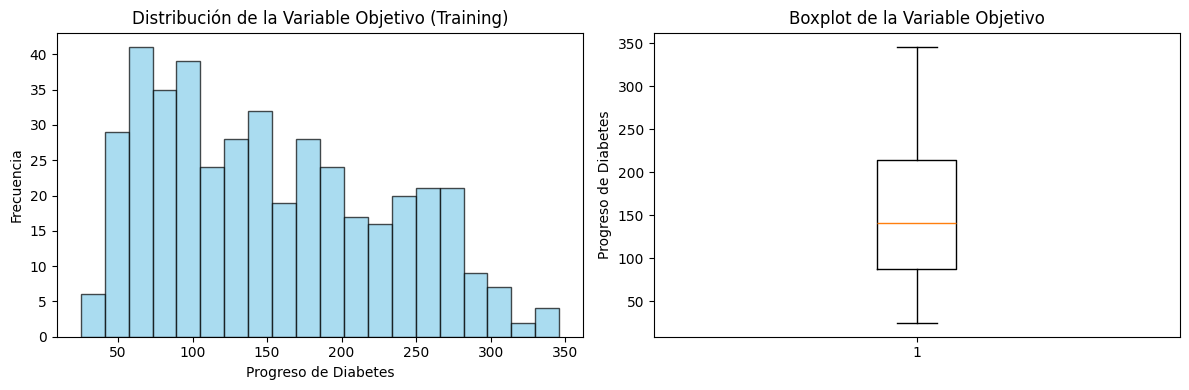

Estadísticas descriptivas de la variable objetivo:
Media: 153.36
Desviación estándar: 77.13
Mínimo: 25.00
Máximo: 346.00


In [11]:
# Análisis exploratorio básico
# 1. Distribución de la variable objetivo
plt.figure(figsize=(12, 4))

# Selecciona el primer subplot (1 fila, 2 columnas, posición 1)
plt.subplot(1, 2, 1)
# Dibuja un histograma de la variable objetivo de entrenamiento
plt.hist(diabetes_target_train, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
# Esta gráfica muestra cómo se distribuyen los valores del progreso de la diabetes en el conjunto de entrenamiento
# Nos sirve para entender si la variable objetivo tiene una distribución normal, sesgada, etc.
plt.title('Distribución de la Variable Objetivo (Training)')
plt.xlabel('Progreso de Diabetes')
plt.ylabel('Frecuencia')

# 2. Estadísticas descriptivas
# Esta parte muestra un boxplot para visualizar la dispersión y posibles outliers en la variable objetivo
# Nos sirve para entender la variabilidad de los datos y detectar valores atípicos
plt.subplot(1, 2, 2)
plt.boxplot(diabetes_target_train)
plt.title('Boxplot de la Variable Objetivo')
plt.ylabel('Progreso de Diabetes')

plt.tight_layout()
plt.show()

print("Estadísticas descriptivas de la variable objetivo:")
print(f"Media: {diabetes_target_train.mean():.2f}")
print(f"Desviación estándar: {diabetes_target_train.std():.2f}")
print(f"Mínimo: {diabetes_target_train.min():.2f}")
print(f"Máximo: {diabetes_target_train.max():.2f}")

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + b*x1 + c*x2 + d*x3 + ....

#### Print your `diabetes_target_test` and compare with the prediction. 

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.